Heart Disease Prediction usingML classifier

Problem statement

We have a data which classified if patients have heart disease or not according to feature in it.We will try to use this data to create a model which tries predict has this disease or not.

Objective

To make a web application that will predict that wheather a person has heart disease or not

1. Load dataset
2. Feature engineering
3. Feature selection
4. 
Feature selectin
5. 
Feature sca. n6. g
Model sel6. i7. on
Sam7. o8. del
Deploy machine learning modellodel

Importing Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load dataset

In [ ]:
df=pd.read_csv("heart_deasease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


>age------- age in years
>sex------- 1 = male,0 = female
>cp-------- chest pain type
>trestbps----- resting blood pressure
>chol -------- serum cholestrol in mg/dl
>fbs --------- (fasting blood sugar > 120 mg/dl) {1 = true; 0= false)
>restecg ---------- resting electrocardiograpic result
>thlach ----------- maximum heart rate achieved
>exang------------- exercise induced angina (1 = yes; 0 = no)
>oldpeack ---------- ST depression induced by exercise relative to rest
>slope ---------- the slope of the peack exercise ST segment
>ca --------- number of major vessels (0-3) coloredby flouroscopy
>thal--------- 1 = normal,2 = fixed defect, 3 = revesable defect


In [ ]:
df.shape

(1025, 14)

Feature engineering

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

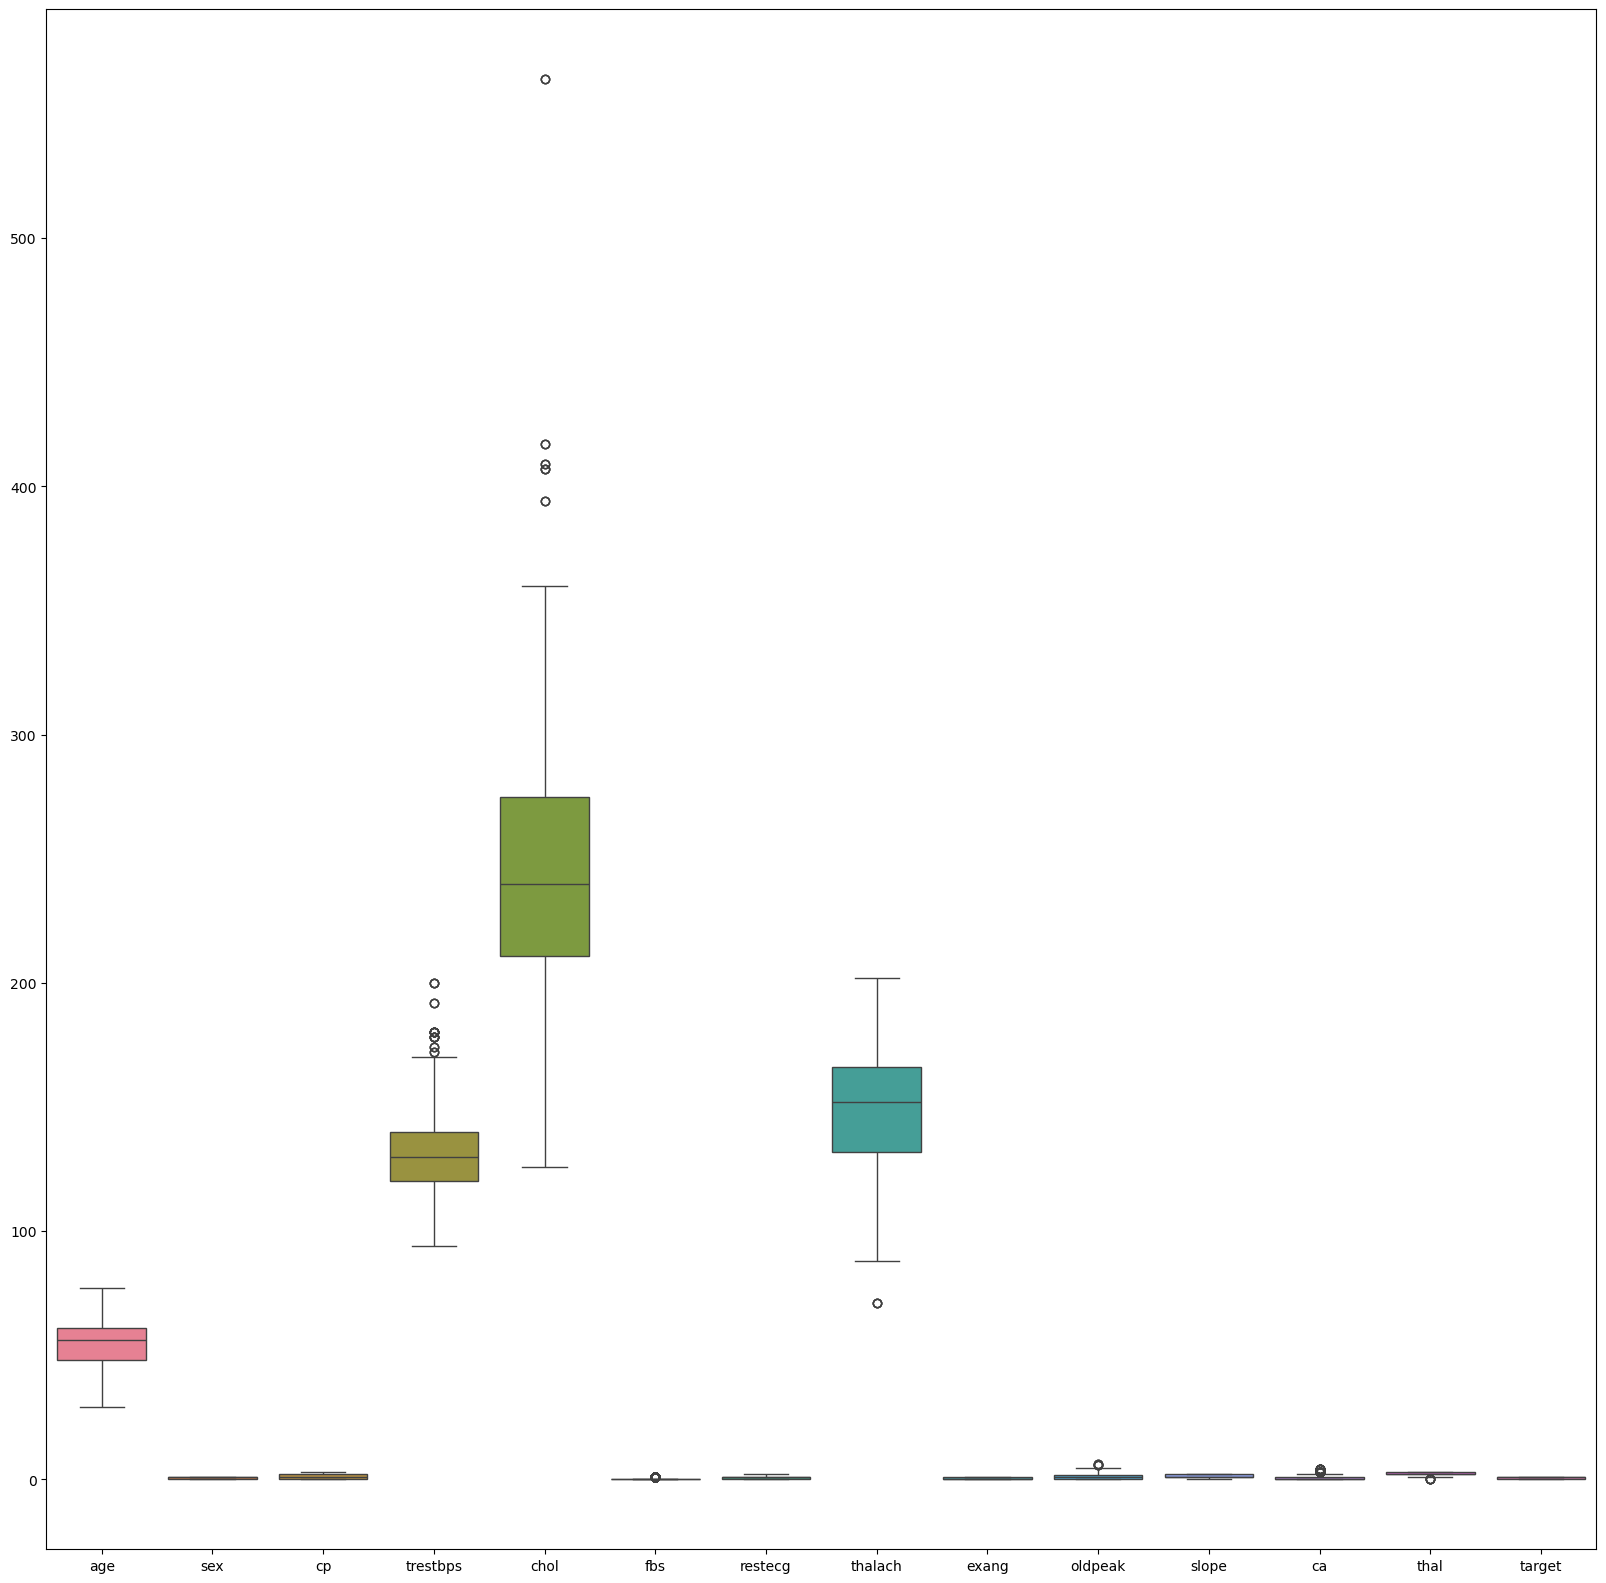

In [ ]:
plt.figure(figsize=(20,20))
ax= sns.boxplot(data=df)

In [ ]:
from scipy.stats import stats
z=np.abs(stats.zscore(df))
print(z)


           age       sex        cp  trestbps      chol       fbs   restecg  \
0     0.268437  0.661504  0.915755  0.377636  0.659332  0.418878  0.891255   
1     0.158157  0.661504  0.915755  0.479107  0.833861  2.387330  1.004049   
2     1.716595  0.661504  0.915755  0.764688  1.396233  0.418878  0.891255   
3     0.724079  0.661504  0.915755  0.936037  0.833861  0.418878  0.891255   
4     0.834359  1.511706  0.915755  0.364875  0.930822  2.387330  0.891255   
...        ...       ...       ...       ...       ...       ...       ...   
1020  0.503520  0.661504  0.055931  0.479107  0.484803  0.418878  0.891255   
1021  0.613800  0.661504  0.915755  0.377636  0.232705  0.418878  1.004049   
1022  0.819834  0.661504  0.915755  1.234378  0.562371  0.418878  1.004049   
1023  0.488996  1.511706  0.915755  1.234378  0.155137  0.418878  1.004049   
1024  0.047877  0.661504  0.915755  0.663216  1.124743  0.418878  0.891255   

       thalach     exang   oldpeak     slope        ca      tha

C:\Users\PC\AppData\Local\Temp\ipykernel_13316\955202051.py:2: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z=np.abs(stats.zscore(df))


In [ ]:
threshold=3
print(np.where(z>3)) #the first array  contains the list of row numbers and second array respective column numers

(array([ 14,  52,  54,  55,  69,  83, 123, 128, 151, 158, 175, 179, 192,
       208, 242, 246, 267, 290, 294, 296, 319, 326, 329, 340, 348, 359,
       378, 393, 417, 428, 450, 464, 465, 481, 508, 521, 526, 559, 597,
       613, 641, 665, 685, 686, 688, 734, 743, 749, 831, 833, 889, 893,
       958, 970, 993, 996], dtype=int64), array([12, 11,  9,  9,  9, 11,  4, 11,  3,  4,  3,  4,  4, 11, 11,  3,  7,
       11,  3,  7, 12,  3, 12, 11, 11, 12,  7,  9, 11, 11,  4,  4, 11,  4,
        3, 11,  9,  7, 11,  9,  4,  4,  4, 12,  3, 12, 11, 11, 11,  9,  4,
       12,  4, 11, 11,  4], dtype=int64))


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = (Q3 - Q1)
print(IQR)

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [ ]:
df= df[(z < 3).all (axis=1)]
df.shape

(969, 14)

In [ ]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape


(769, 14)

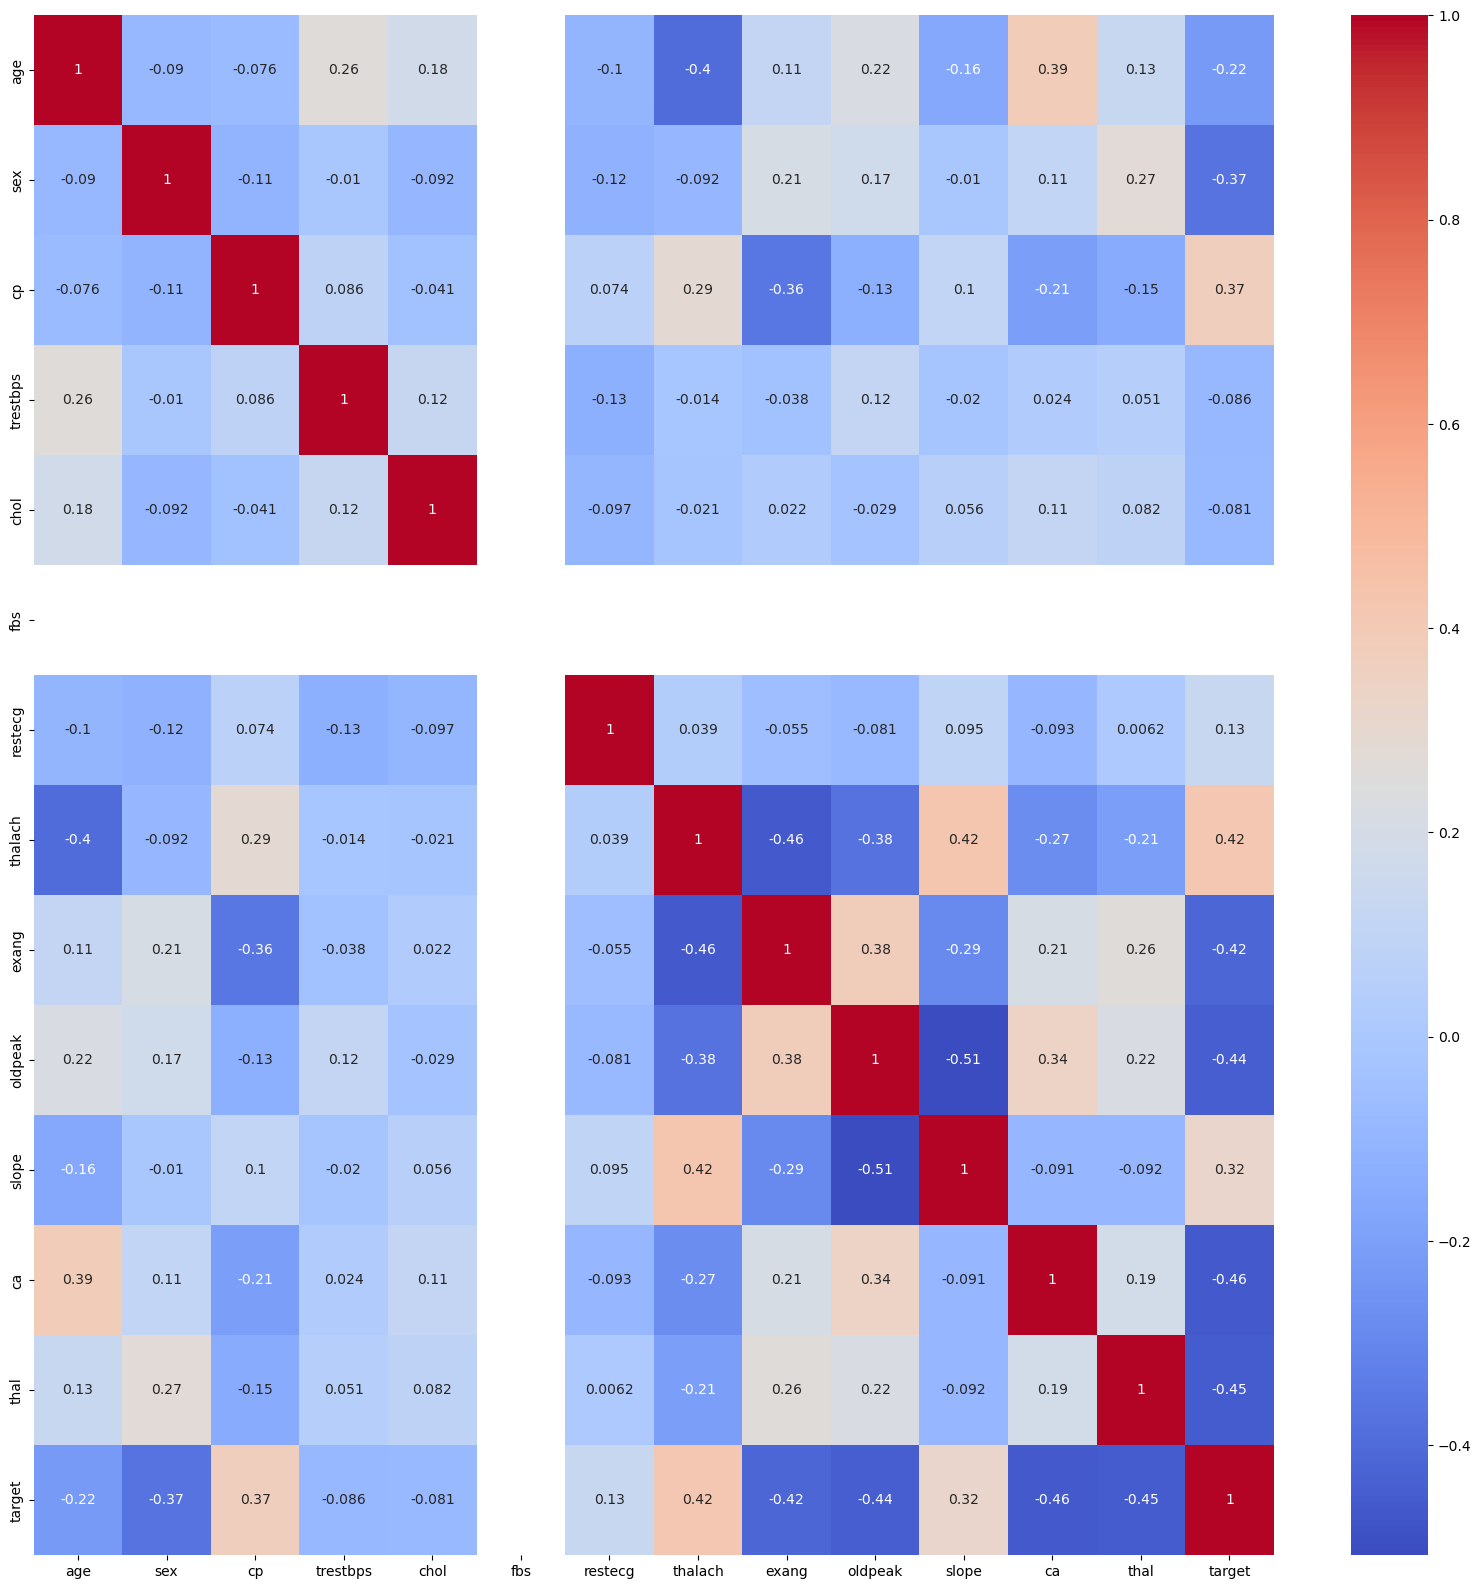

In [ ]:
plt.figure(figsize=(20,20))
d=sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [ ]:
# df=df.drop(columns="chol")
# df.head()

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.0,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,53.431730,0.691808,0.924577,128.685306,242.075423,0.0,0.551365,150.669701,0.323797,0.972432,1.438231,0.495449,2.331599,0.548765
std,9.225098,0.462047,1.019105,15.314066,44.521145,0.0,0.515667,22.567898,0.468228,1.050258,0.589973,0.705479,0.568764,0.497940
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.0,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.0,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


Feature scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
dataset= pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']) # creating dummy variable
columns_to_scale=['age','trestbps','thalach','oldpeak'] # we have taken these columns for scale downa
dataset[columns_to_scale]=StandardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
0,-0.155300,-0.240805,212,0.768418,0.026266,0,False,True,True,False,...,False,False,False,True,False,False,True,False,False,True
2,1.797168,1.066034,174,-1.138183,1.550693,0,False,True,True,False,...,True,True,False,False,True,False,False,False,False,True
3,0.820934,1.262060,203,0.458041,-0.926501,0,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
5,0.495523,-1.874354,248,-1.271202,0.026266,1,True,False,True,False,...,False,False,True,False,True,False,False,False,True,False
7,0.170111,2.046163,289,-0.251392,-0.164287,0,False,True,True,False,...,True,False,True,False,False,True,False,False,False,True


In [ ]:
dataset.tail()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
1020,0.603993,0.739324,221,0.591060,-0.926501,1,False,True,False,True,...,True,False,False,True,True,False,False,False,True,False
1021,0.712463,-0.240805,258,-0.428750,1.741247,0,False,True,True,False,...,True,False,True,False,False,True,False,False,False,True
1022,-0.697653,-1.220934,275,-1.448560,0.026266,0,False,True,True,False,...,True,False,True,False,False,True,False,False,True,False
1023,-0.372241,-1.220934,254,0.369362,-0.926501,1,True,False,True,False,...,False,False,False,True,True,False,False,False,True,False
1024,0.061641,-0.567515,188,-1.670258,0.407373,0,False,True,True,False,...,False,False,True,False,False,True,False,False,False,True


In [ ]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,7.690000e+02,7.690000e+02,769.000000,7.690000e+02,7.690000e+02,769.000000
mean,2.633351e-16,8.177247e-16,242.075423,-4.804710e-16,6.929871e-17,0.548765
std,1.000651e+00,1.000651e+00,44.521145,1.000651e+00,1.000651e+00,0.497940
min,-2.650122e+00,-2.266405e+00,131.000000,-2.778747e+00,-9.265009e-01,0.000000
25%,-8.061233e-01,-5.675147e-01,209.000000,-7.834669e-01,-9.265009e-01,0.000000
50%,6.164057e-02,8.590468e-02,239.000000,1.476640e-01,-3.548407e-01,1.000000
75%,7.124635e-01,7.393241e-01,270.000000,7.684180e-01,5.979264e-01,1.000000
max,2.447991e+00,2.699582e+00,360.000000,2.275963e+00,2.884567e+00,1.000000


Visualization

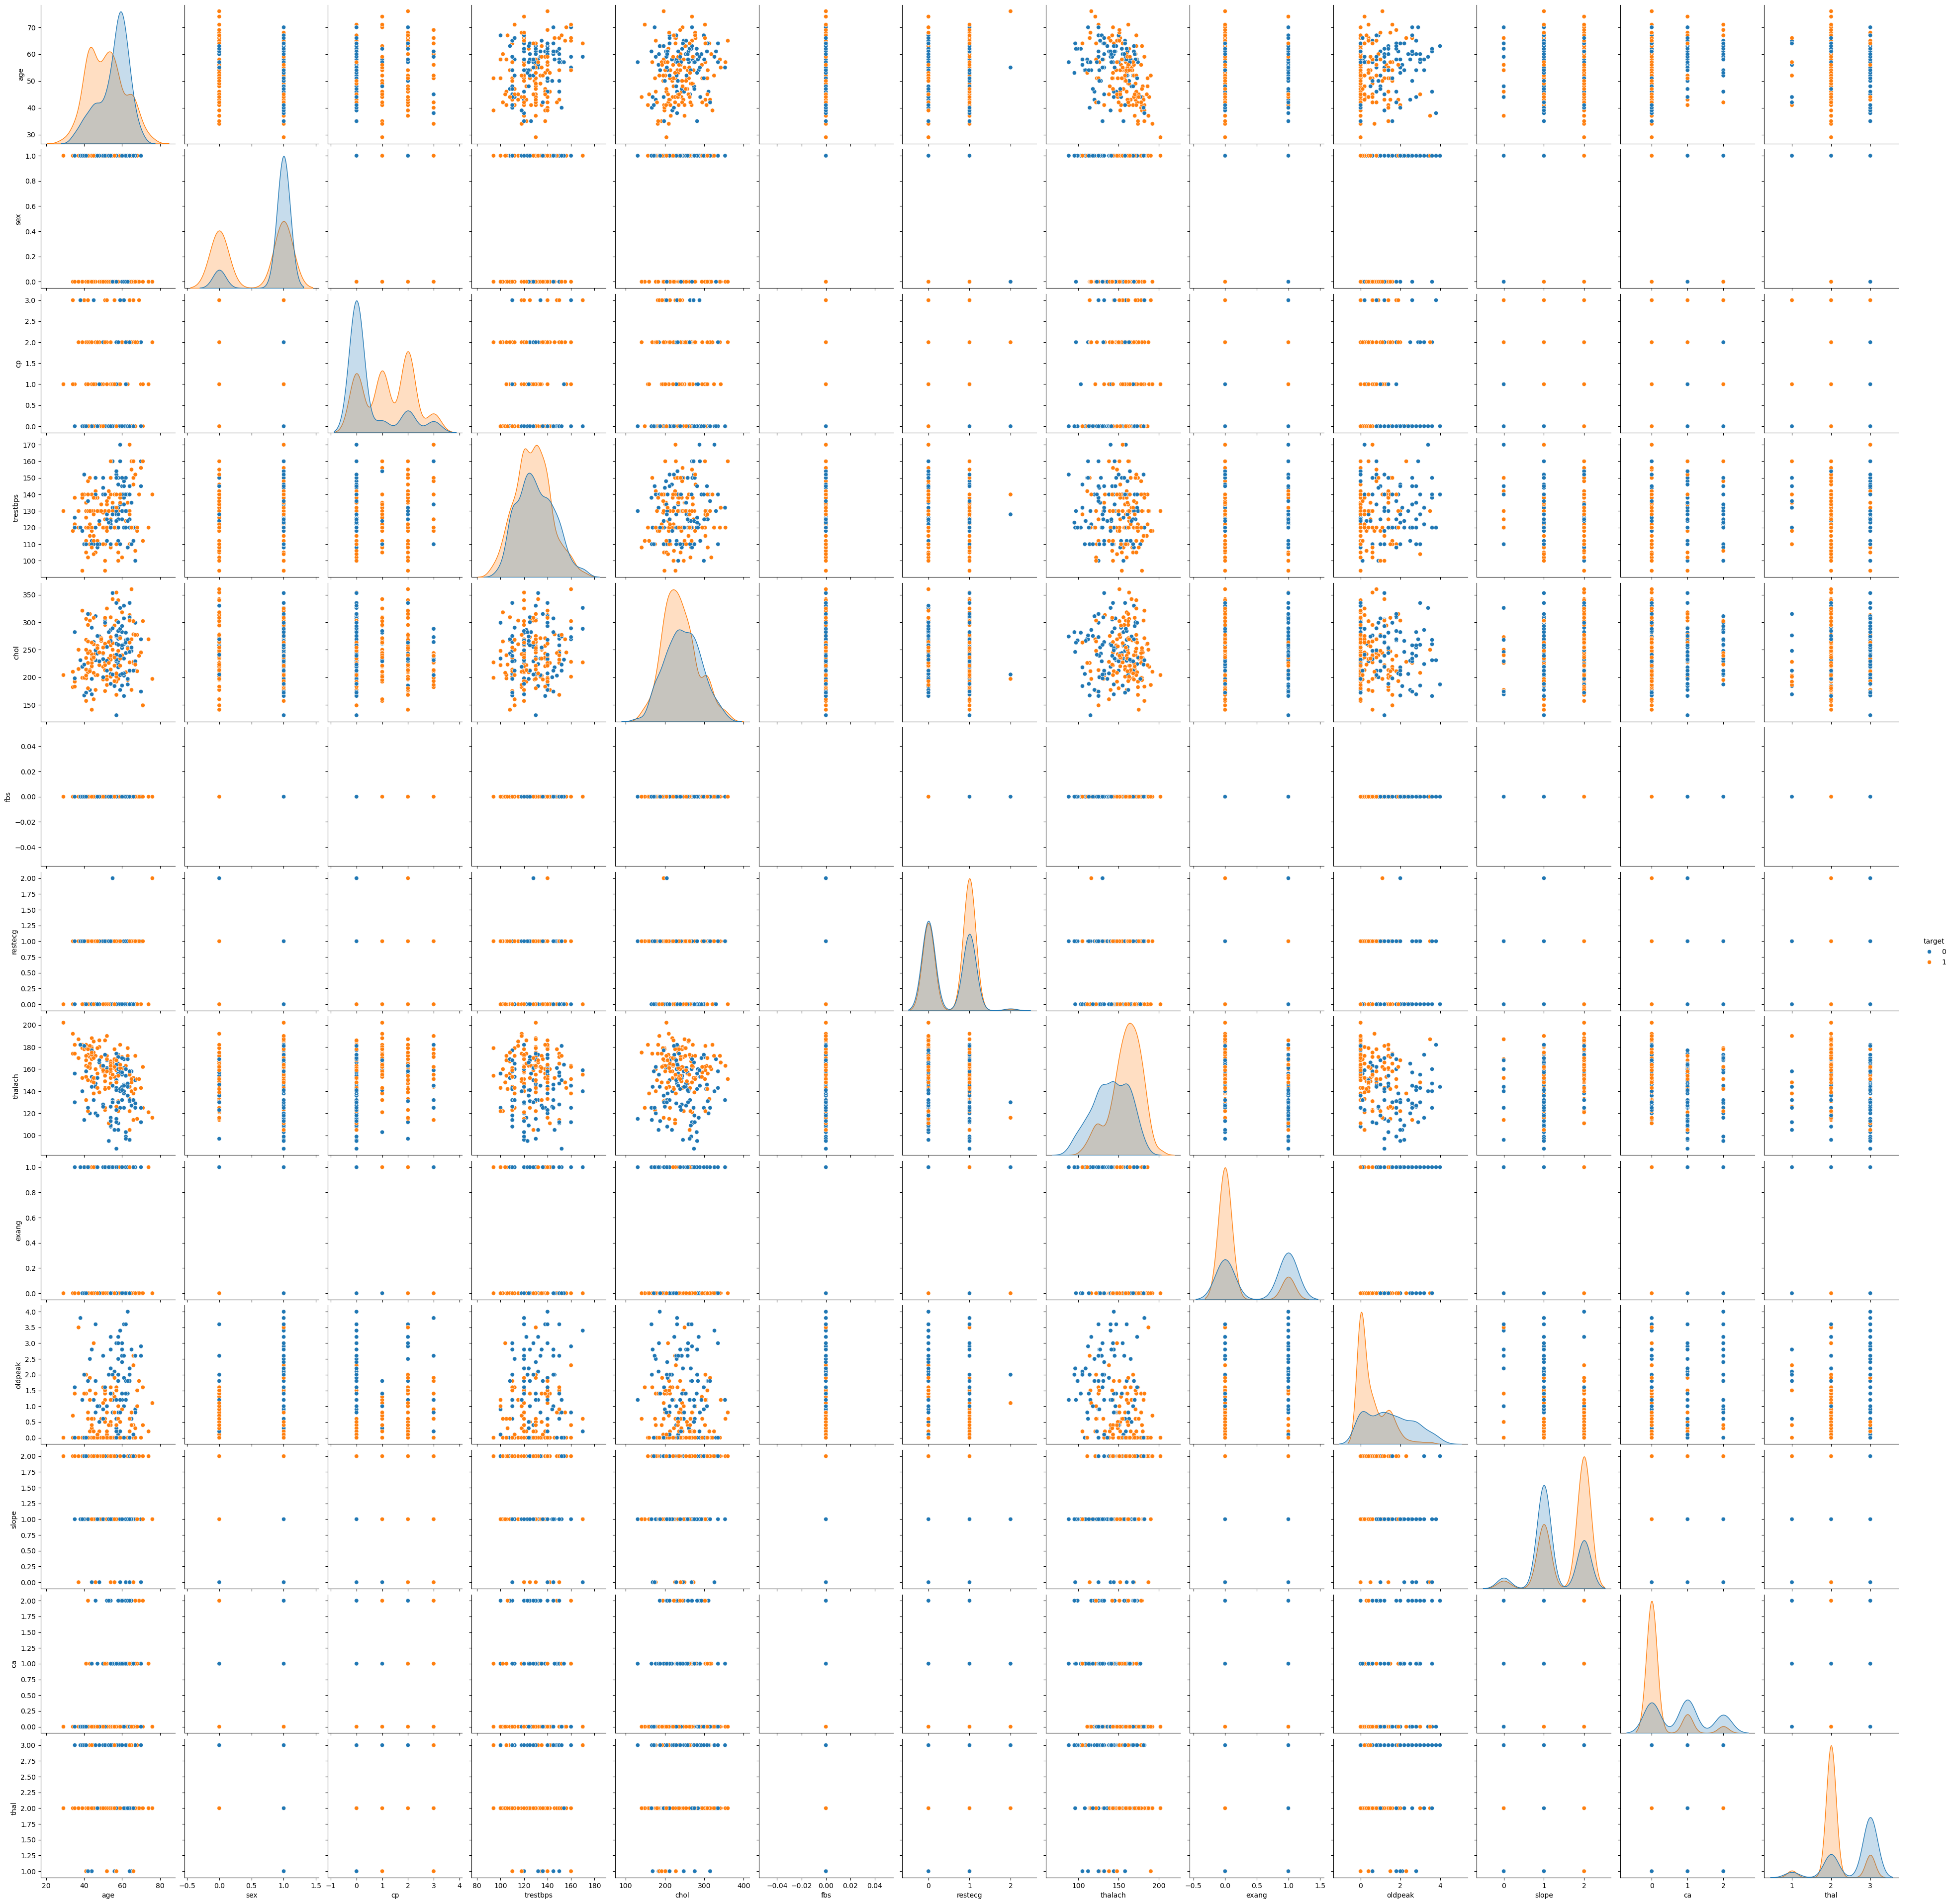

In [ ]:
sns.pairplot(df, hue='target',height=3,aspect=1)

Model selection

In [ ]:
y= dataset['target']
X= dataset.drop(['target'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

K- Nearest NeighbourClassifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train) # Use X_train and y_train instead of x_train and y_train
score=cross_val_score(knn_classifier,X_train,y_train,cv=10) # Use X_train instead of x_train
y_pred_knn=knn_classifier.predict(X_test) # Use X_test instead of x_test
accuracy_score(y_test,y_pred_knn)

0.8116883116883117

In [ ]:
score.mean()

0.8390798519301956

In [ ]:
knn_classifier=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                    metric_params=None, n_jobs=1, n_neighbors=5, p=1,
                                    weights='uniform') # Changed 'Leaf_size' to 'leaf_size'
knn_classifier.fit(X_train,y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)      
y_pred_knn=knn_classifier.predict(X_test)
accuracy_score(y_test,y_pred_knn)                                     #due to highper parameter tuning

0.8246753246753247

In [ ]:
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
score.mean()

0.8601533580116338

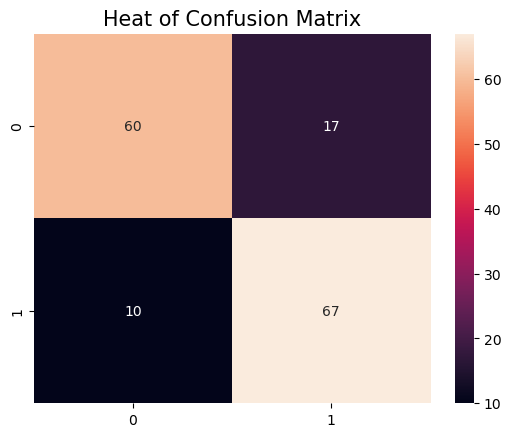

In [ ]:
#confusion metrix
cm=confusion_matrix(y_test,y_pred_knn)
plt.title('Heat of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.80      0.87      0.83        77

    accuracy                           0.82       154
   macro avg       0.83      0.82      0.82       154
weighted avg       0.83      0.82      0.82       154



Random Forest Classifier



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=51)
rf_classifier.fit(X_train,y_train)
y_pred_rf=rf_classifier.predict(X_test)
accuracy_score(y_test,y_pred_rf)

1.0

In [ ]:
score=cross_val_score(rf_classifier,X_train,y_train,cv=10)
score.mean()==cross_val_score(rf_classifier,X_train,y_train,cv=10)
score.mean()

0.9870174510840826

XGBoost Classifier

In [ ]:
pip install xgboost

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1000)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier
xgb_classifier= XGBClassifier(base_score=0.5,booster='gbtree',colasample_bylevel=1,
      colasample_bynode=1,colsample_bytree=0.4,gamma=0.2,
      learning_rate=0.1,max_delta_step=0,max_depth=15,
       min_child_weight=1,missing=np.nan, # Changed missing to np.nan
       n_estimators=100,n_jobs=1,
       nthread=None,objective='binary:logistic',random_state=23,
      reg_alpha=0,reg_lamda=1,scale_pos_weight=1,seed=None,
      silent=None,subsample=1,verbosity=1)
xgb_classifier.fit(X_train,y_train)
y_pred_xgb=xgb_classifier.predict(X_test)
accuracy_score(y_test,y_pred_xgb)

C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:13:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colasample_bylevel", "colasample_bynode", "reg_lamda" } are not used.

  warnings.warn(smsg, UserWarning)


0.9805194805194806

In [ ]:
score=cross_val_score(xgb_classifier,X_train,y_train,cv=10)
score.mean()

C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:13:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colasample_bylevel", "colasample_bynode", "reg_lamda" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:13:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colasample_bylevel", "colasample_bynode", "reg_lamda" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:13:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colasample_bylevel", "colasample_bynode", "reg_lamda"

0.9935219460602855

AdaBoost with Random Forest

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators= 100)
ada_clf.fit(X_train, y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=100)

In [ ]:
y_pred_adb=ada_clf.predict(X_test)
accuracy_score(y_test,y_pred_adb)

0.9805194805194806

In [ ]:
score=cross_val_score(ada_clf,X_train,y_train,cv=10)
score.mean()

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PC\anaconda3\Li

0.993495505023797

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_classifier=GradientBoostingClassifier()
gbc_classifier.fit(X_train,y_train)
y_pred_gbc=gbc_classifier.predict(X_test)
accuracy_score(y_test,y_pred_gbc)

0.9805194805194806

In [ ]:
y_pred_adb=ada_clf.predict(X_test)
accuracy_score(y_test,y_pred_adb)

0.9805194805194806

In [ ]:
score=cross_val_score(gbc_classifier,X_train,y_train,cv=10)
score.mean()

0.9918561607615018

Save Model

In [ ]:
#picke
from xgboost import XGBClassifier
import pickle
#save model
pickle.dump(knn_classifier,open('model.pkl','wb'))
# load model
Heart_Disease_prediction_model=pickle.load(open('model.pkl','rb'))
#predict the output
y_pred =Heart_Disease_prediction_model.predict(X_test)
#confusion matrix
print('Confusion matrix of XGBoost model: \n' , confusion_matrix(y_test , y_pred) ,'\n')

#show the accuracy
print('Accuracy of K - Nearest Neighbour model = ' ,accuracy_score(y_test , y_pred))

Confusion matrix of XGBoost model: 
 [[60 17]
 [10 67]] 

Accuracy of K - Nearest Neighbour model =  0.8246753246753247
